In [ ]:
#import libraries
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#import dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
len(np.unique(test_labels))

10

number of classes is 10
(max of labels + 1 --> number of classes) OR len of labels

In [ ]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

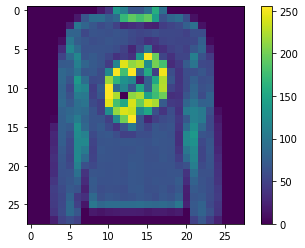

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[123])
plt.colorbar()

In [ ]:
train_images=[i.reshape(784) for i in train_images]
test_images=[i.reshape(784) for i in test_images]
np.array(train_images).shape

(60000, 784)

In [ ]:
train_images=np.array(train_images)
test_images=np.array(test_images)
train_images.astype('float32')
test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
train_labels=keras.utils.to_categorical(train_labels,num_classes=10)
test_labels=keras.utils.to_categorical(test_labels,num_classes=10)

In [ ]:
model=Sequential()
model.add(Dense(70,activation='relu',input_dim=784))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [ ]:
from keras.backend import categorical_crossentropy
optimizer=Adam(lr=0.01)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
h = model.fit(train_images,train_labels,batch_size=120,validation_split=0.2,epochs=15)

Epoch 1/15
400/400 [==============================] - 5s 5ms/step - loss: 0.8657 - accuracy: 0.6923 - val_loss: 0.4602 - val_accuracy: 0.8352
Epoch 2/15
400/400 [==============================] - 3s 7ms/step - loss: 0.5124 - accuracy: 0.8249 - val_loss: 0.4141 - val_accuracy: 0.8512
Epoch 3/15
400/400 [==============================] - 3s 7ms/step - loss: 0.4536 - accuracy: 0.8443 - val_loss: 0.3792 - val_accuracy: 0.8638
Epoch 4/15
400/400 [==============================] - 3s 8ms/step - loss: 0.4110 - accuracy: 0.8567 - val_loss: 0.3758 - val_accuracy: 0.8607
Epoch 5/15
400/400 [==============================] - 3s 8ms/step - loss: 0.3900 - accuracy: 0.8632 - val_loss: 0.3747 - val_accuracy: 0.8619
Epoch 6/15
400/400 [==============================] - 2s 5ms/step - loss: 0.3733 - accuracy: 0.8695 - val_loss: 0.3639 - val_accuracy: 0.8700
Epoch 7/15
400/400 [==============================] - 2s 4ms/step - loss: 0.3606 - accuracy: 0.8726 - val_loss: 0.3630 - val_accuracy: 0.8650
Epoch 

In [ ]:
model.evaluate(test_images,test_labels,batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 0.3815 - accuracy: 0.8729


[0.3815006613731384, 0.8729000091552734]

In [ ]:
p = model.predict(test_images)


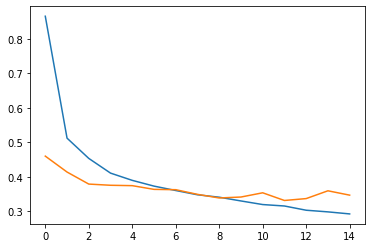

In [ ]:
from matplotlib import pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])